In [1]:
#dependencies
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
#importing database location
from config import location

In [2]:
#connection to database
engine = create_engine(location)
connection = engine.connect()

In [3]:
#creating dataframes from sql databases
salaries=pd.read_sql("SELECT * FROM salaries", connection)
titles=pd.read_sql("SELECT * FROM titles",connection)

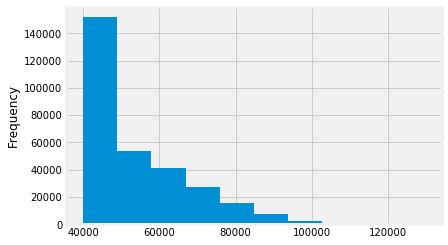

In [4]:
#histogram plot of employee salaries
plot=salaries['salary'].plot(kind="hist")
fig=plot.get_figure()
fig.savefig("salary_histogram")

In [5]:
#merge of employee titles and salries
titles=titles[['emp_no','title']]
titles_salaries=titles.join(salaries.set_index('emp_no'),on="emp_no")

In [6]:
#group by on employee titles and averging the results
titles_salaries_group=titles_salaries.groupby('title').mean()

In [7]:
#dropping the emp_no column
titles_salaries_group=titles_salaries_group.drop(columns=['emp_no'])

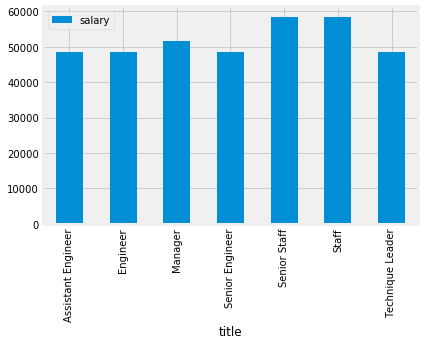

In [8]:
#plot of the average salary for each title
plot=titles_salaries_group.plot(kind='bar')
fig=plot.get_figure()
fig.savefig("avg_salary_by_title")